In [1]:
# MNIST DATASET

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()  # keras include mnist dataset as a built-in dataset in it
                                                                     # we don't need to perform train-test-split
                                                                      # and it is present in the form of pixels

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

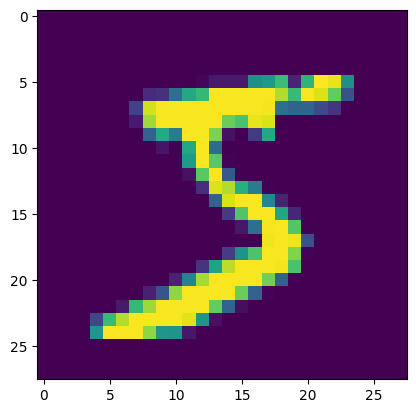

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

First we need to bring array between 0 to 1 because when we train neural network, if the values are in similar range then we get correct weights and conversion becomes fasters

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model = Sequential()       # creating keras sequential model

    ## Now we will add layers in the model
## converting 2d araay into 1D          we have 28x28 we are converting it into 784

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))     # 128 nodes
model.add(Dense(10,activation='softmax'))     # output layer ------10 nodes-----use softmax function for output layer


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')         # loss fuction = sparse categorical crossentropy

In [16]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2908 - val_loss: 0.1622
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1317 - val_loss: 0.1216
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0890 - val_loss: 0.0961
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0657 - val_loss: 0.1002
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0490 - val_loss: 0.0927
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0385 - val_loss: 0.0884
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0313 - val_loss: 0.0859
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0246 - val_loss: 0.0950
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0197 - val_loss: 0.1017
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.016

In [17]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [18]:
y_pred = y_prob.argmax(axis = 1)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9744

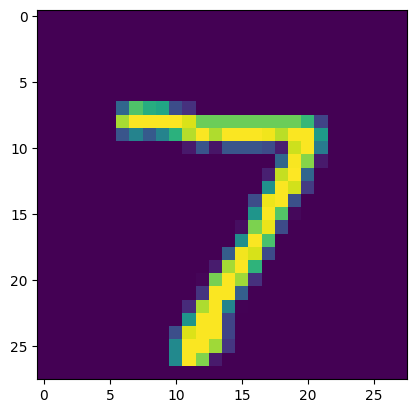

In [21]:
plt.imshow(X_test[0])

In [23]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 43ms/step


array([7])

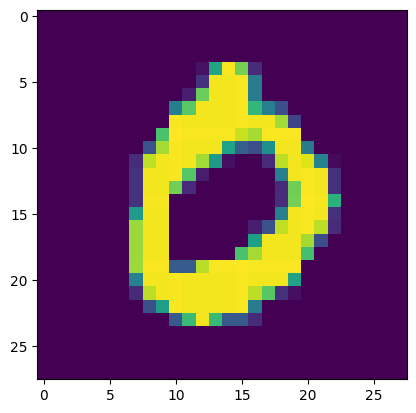

In [24]:
plt.imshow(X_test[3])

In [25]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 73ms/step


array([0])

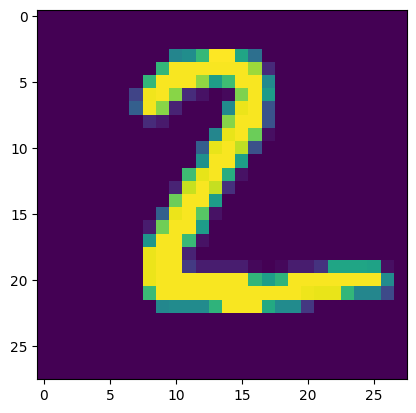

In [26]:
plt.imshow(X_test[1])

In [27]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 36ms/step


array([2])